In [24]:
import pandas as pd
import synapseclient
import synapseutils
import os
import configparser
from collections import OrderedDict

config_path = os.path.join(os.environ['HOME'], '.synapseConfig')
cfg = configparser.ConfigParser()
cfg.read(config_path)
syn_usr = cfg.get("authentication", "username")
syn_pwd = cfg.get("authentication", "password")
syn = synapseclient.login(email=syn_usr, password=syn_pwd, rememberMe=True)


sub2_synapse_id = 'syn10139539'
# if 'files' not in locals():
files = synapseutils.syncFromSynapse(syn, sub2_synapse_id)

data_dict = OrderedDict()
for fl in files:
    data_dict[fl.name] = pd.read_csv(fl.path, sep='\t')

Welcome, Joy Rimchala!



# Read the data and summarize

In [25]:
import pandas as pd
import synapseclient
import synapseutils
import os
import configparser
from collections import OrderedDict

sub2_dir = '../data/sub2/'
bre_rnaseq = pd.read_csv(os.path.join(sub2_dir, 'retrospective_breast_rna_seq_sort_common_gene_15115.txt'), sep='\t')
bre_cna = pd.read_csv(os.path.join(sub2_dir, 'retrospective_breast_CNA_median_sort_common_gene_16884.txt'), sep='\t')
bre_proteome = pd.read_csv(os.path.join(sub2_dir, 'retrospective_breast_proteome_filtered.txt'), sep='\t')
print("Breast Cancer Data Summary ")
print("="*70)
print("RNASeq   : No.Samples : {}, No.Genes: {}".format(len(bre_rnaseq.columns)-1, len(bre_rnaseq)))
print("CNA      : No.Samples : {}, No.Genes: {}".format(len(bre_cna.columns)-1, len(bre_cna)))
print("Proteome : No.Samples : {}, No.Genes: {}".format(len(bre_proteome.columns)-1, len(bre_proteome)))
print("\n")
ova_rnaseq = pd.read_csv(os.path.join(sub2_dir, 'retrospective_ova_rna_seq_sort_common_gene_15632.txt'), sep='\t')
ova_cna = pd.read_csv(os.path.join(sub2_dir, 'retrospective_ova_CNA_sort_common_gene_11859.txt'), sep='\t')
ova_proteome = pd.read_csv(os.path.join(sub2_dir, 'retrospective_ova_proteome_filtered.txt'), sep='\t')

print("Overian Cancer Data Summary ")
print("="*70)
print("RNASeq   : No.Samples : {}, No.Gene: {}".format(len(ova_rnaseq.columns)-1, len(ova_rnaseq)))
print("CNA      : No.Samples : {}, No.Gene: {}".format(len(ova_cna.columns)-1, len(ova_cna)))
print("Proteome : No.Samples : {}, No.Gene: {}".format(len(ova_proteome.columns)-1, len(ova_proteome)))


Breast Cancer Data Summary 
RNASeq   : No.Samples : 77, No.Genes: 15115
CNA      : No.Samples : 77, No.Genes: 16884
Proteome : No.Samples : 105, No.Genes: 10597


Overian Cancer Data Summary 
RNASeq   : No.Samples : 294, No.Gene: 15632
CNA      : No.Samples : 559, No.Gene: 11859
Proteome : No.Samples : 174, No.Gene: 7163


## Filter for PAM50

In [2]:
%%sh
wget https://genome.unc.edu/pubsup/breastGEO/pam50_centroids.txt ../data/sub2/

--2017-07-17 16:23:08--  https://genome.unc.edu/pubsup/breastGEO/pam50_centroids.txt
Resolving genome.unc.edu... 152.19.9.40
Connecting to genome.unc.edu|152.19.9.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4892 (4.8K) [text/plain]
Saving to: ‘pam50_centroids.txt.1’

     0K ....                                                  100% 62.2K=0.08s

2017-07-17 16:23:13 (62.2 KB/s) - ‘pam50_centroids.txt.1’ saved [4892/4892]

--2017-07-17 16:23:13--  http://../data/sub2/
Resolving ..... failed: nodename nor servname provided, or not known.
wget: unable to resolve host address ‘..’
FINISHED --2017-07-17 16:23:13--
Total wall clock time: 5.0s
Downloaded: 1 files, 4.8K in 0.08s (62.2 KB/s)


In [26]:
import pandas as pd
sample_cols = [c for c in bre_proteome.columns if c.startswith('TCGA')]

def filter_PAM50(df, PAM50, gene_col='Gene_ID'):
    return df[df[gene_col].apply(lambda x: x in PAM50)]

if 'PAM50_df' not in locals():
    PAM50_df = pd.read_csv('../data/sub2/pam50_centroids.txt', sep='\t')
    PAM50_df = PAM50.rename(columns={'Unnamed: 0': 'Gene_ID'})
    PAM50 = set(PAM50_df['Gene_ID'])

PAM50_bre_rnaseq = filter_PAM50(bre_rnaseq, PAM50)
PAM50_bre_cna = filter_PAM50(bre_cna, PAM50)
PAM50_bre_proteome = filter_PAM50(bre_proteome, PAM50)

In [32]:
PAM50_bre_cna

http://david.abcc.ncifcrf.gov/api.jsp?type=ENTREZ_GENE_ID&ids=ACTR3B&tool=summary

,Gene_ID,TCGA-A2-A0CM,TCGA-A2-A0D2,TCGA-A2-A0EQ,TCGA-A2-A0EV,TCGA-A2-A0EX,TCGA-A2-A0EY,TCGA-A2-A0SW,TCGA-A2-A0SX,TCGA-A2-A0T3,...,TCGA-C8-A12Z,TCGA-C8-A130,TCGA-C8-A131,TCGA-C8-A134,TCGA-C8-A135,TCGA-C8-A138,TCGA-D8-A142,TCGA-E2-A154,TCGA-E2-A158,TCGA-E2-A15A
197,ACTR3B,-0.146,0.975,0.102,0.315,0.089,-0.085,0.528,0.148,0.928,...,-0.649,0.293,-0.032,0.616,-0.366,-0.130,-0.018,0.481,0.943,-0.763
641,ANLN,-0.114,-0.058,0.148,0.322,0.092,0.391,0.528,-0.452,0.321,...,0.014,0.559,0.395,-0.595,0.046,0.146,-0.003,0.481,0.928,0.282
1205,BAG1,0.162,-0.041,0.154,-0.004,0.014,1.118,-0.012,0.488,0.583,...,0.013,-0.415,-0.170,0.032,0.000,0.204,-0.060,0.134,0.864,-0.473
1270,BCL2,-0.188,1.157,0.471,-0.353,-0.052,0.003,-0.028,-0.403,-0.006,...,-0.660,0.066,-0.062,0.008,-0.330,-0.490,-0.177,-0.540,0.030,-0.483
1338,BIRC5,0.185,0.231,0.472,0.891,0.033,-0.041,0.709,-0.117,1.852,...,-0.633,0.161,-0.214,0.053,0.996,-0.455,0.381,0.015,0.110,0.203
1349,BLVRA,-0.097,-0.045,-0.180,0.322,0.092,0.391,0.528,-0.452,-0.672,...,0.014,0.559,0.395,0.027,0.046,0.146,-0.003,0.481,0.928,0.282
2241,CCNB1,-0.302,-0.031,-0.325,0.290,-0.011,-0.401,0.010,-0.589,-0.033,...,-0.036,-0.452,-0.456,-0.543,-0.135,-0.145,-0.432,0.000,-0.946,-0.371
2249,CCNE1,3.657,0.526,0.137,-0.009,0.501,0.166,-0.018,1.883,1.669,...,-0.578,0.252,0.011,0.050,0.028,-0.447,0.201,0.051,0.055,-0.001
2376,CDC20,0.174,0.564,-0.115,-0.026,0.021,-0.380,0.263,0.110,-0.025,...,-0.600,-0.001,-0.023,0.586,-0.144,-0.468,-0.215,-0.526,1.005,-0.068
2400,CDC6,-0.271,-0.078,-0.003,0.858,0.033,-0.045,-0.562,-0.119,0.460,...,3.657,0.677,-0.214,-0.509,0.065,2.026,0.042,0.015,-0.903,0.203


## Hierarchical Clustering

In [27]:
# Further scoping down the analysis
transposed_rnaseq = PAM50_bre_rnaseq.set_index('Gene_ID').T
transposed_rnaseq.columns = 'rna-' + transposed_rnaseq.columns
transposed_cna = PAM50_bre_cna.set_index('Gene_ID').T
transposed_cna.columns = 'cna-' + transposed_cna.columns
transposed_proteome = PAM50_bre_proteome.set_index('Gene_ID').T
transposed_proteome.columns = 'proteome-' + transposed_proteome.columns

breast_common_samples = (
    transposed_rnaseq
        .merge(transposed_cna, left_index=True, right_index=True)
        .merge(transposed_proteome, left_index=True, right_index=True)
).index

Populating the interactive namespace from numpy and matplotlib


/Users/trimchala/miniconda/envs/synapse-env/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


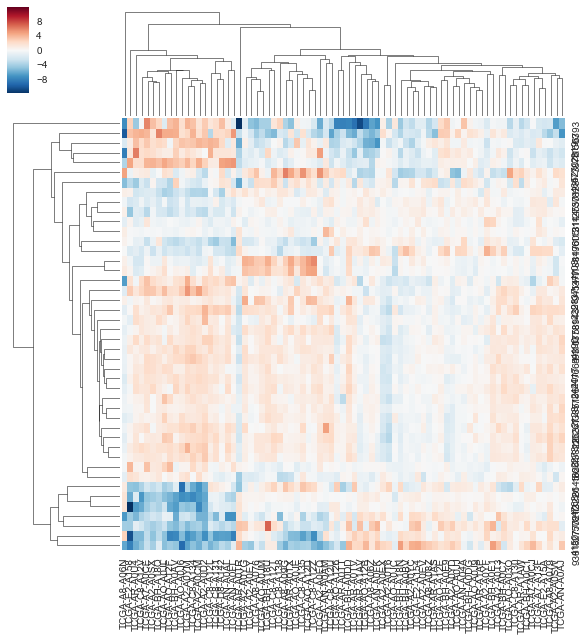

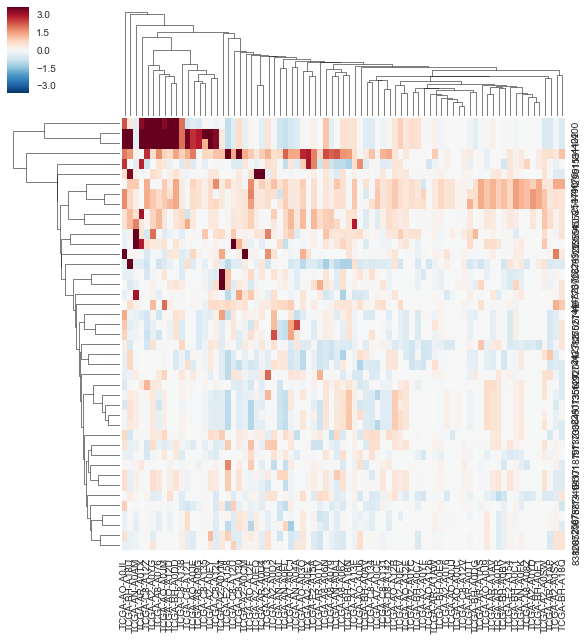

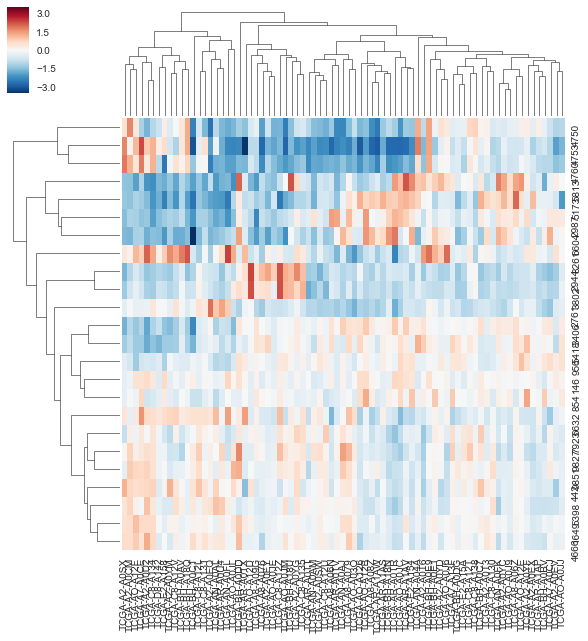

In [28]:
% pylab inline
import pandas as pd
import seaborn as sns
sns.set()

gene_id = PAM50_bre_rnaseq["Gene_ID"]

lut = dict(zip(gene_id.unique(), "rbg"))
row_colors = gene_id.map(lut)
clust_rnaseq = sns.clustermap(
    PAM50_bre_rnaseq[breast_common_samples].dropna()
)

clust_cna = sns.clustermap(
    PAM50_bre_cna[breast_common_samples].dropna()
)

clust_proteome = sns.clustermap(
    PAM50_bre_proteome[breast_common_samples].dropna()
)

In [29]:
bre_rnaseq_35 = PAM50_bre_rnaseq[['Gene_ID'] + list(breast_common_samples)]
bre_cna_35 = PAM50_bre_cna[['Gene_ID'] + list(breast_common_samples)]
bre_proteome_35 = PAM50_bre_proteome[['Gene_ID'] + list(breast_common_samples)]